<a href="https://colab.research.google.com/github/Ragavi-Ohm/ARRAYS/blob/main/20bce1988_SMOTE%2BHYPERTUNING(LOGREG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [7]:
train=pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


# New Section

In [8]:
train.shape

(42271, 11)

In [9]:
list(train)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

****EXPLORATORY DATA ANALYSIS******

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [11]:
# train.count() does not include NaN values
df2 = train[[column for column in train if train[column].count() / len(train) >= 0.3]]
train=train.drop(['step'],axis=1)
print("List of dropped columns:", end=" ")
for c in train.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
train = df2

List of dropped columns: 



//it means that none of the feature has Nan value 

In [12]:
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [13]:
list(set(train.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [14]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head()
features=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

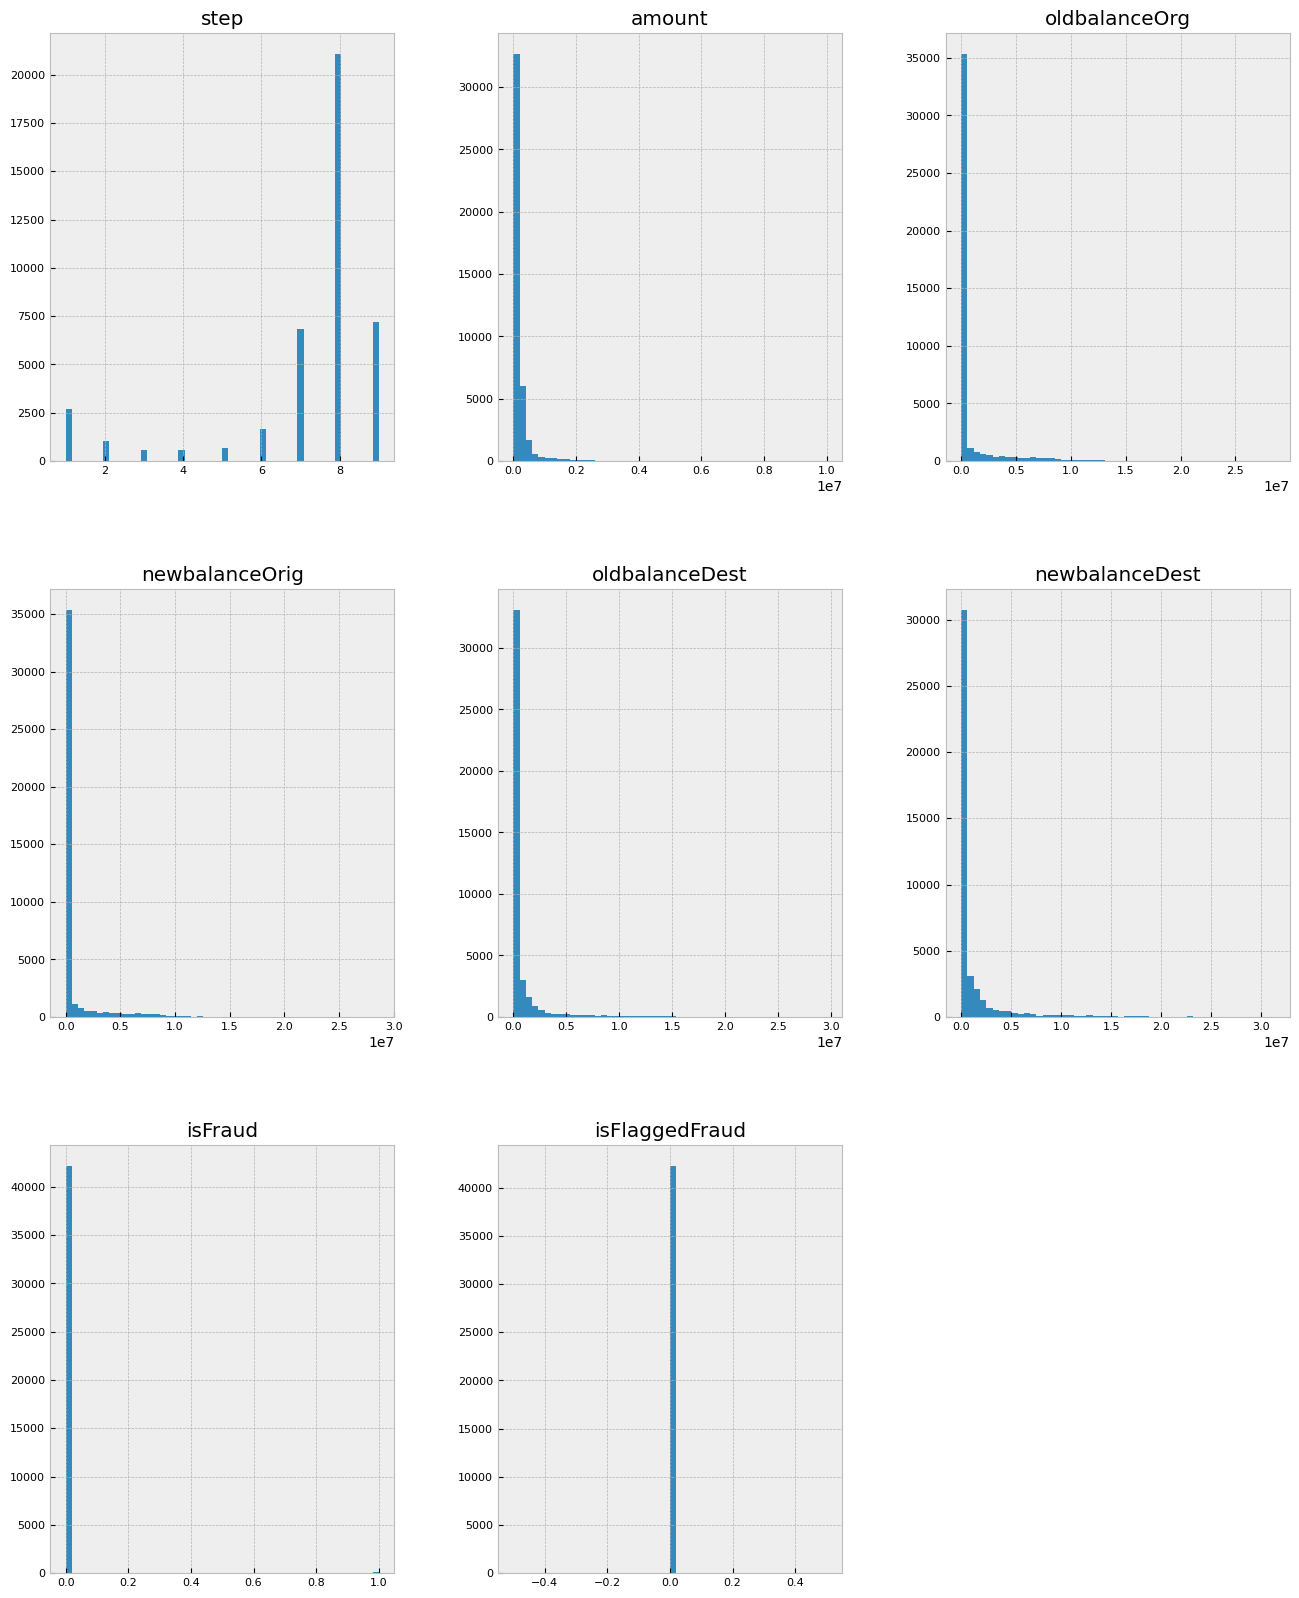

In [15]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

**Features such as 'amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest' seems to share a similar distribution to the one we have with 'isFraud'**

<Axes: xlabel='type', ylabel='count'>

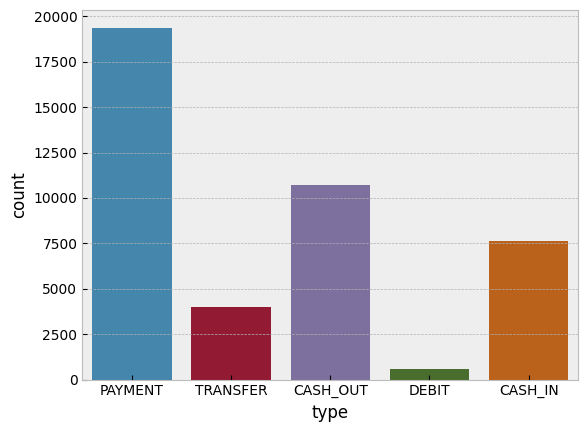

In [16]:
sns.countplot(x='type',data=train)

**Cash out and payment are the most common type of transactions.**

<Axes: xlabel='type', ylabel='amount'>

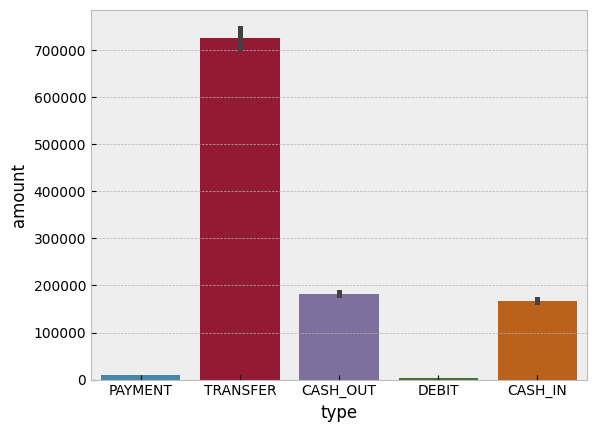

In [17]:
sns.barplot(x='type',y='amount',data=train)

**Although 'cash out' and 'payment' are the most common type of transactions, 'transfer' type has the maximum amount of money being transfered to the recipient.**

<Axes: xlabel='isFraud', ylabel='count'>

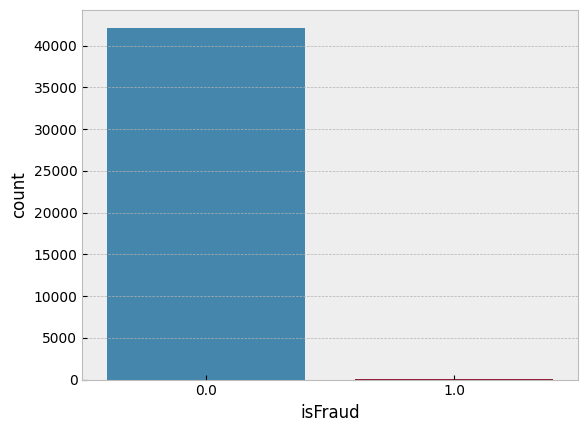

In [18]:
sns.countplot(x='isFraud',data=train)

**The above graph indicates that the dataset is highly unbalanced.**

<Axes: xlabel='step', ylabel='Density'>

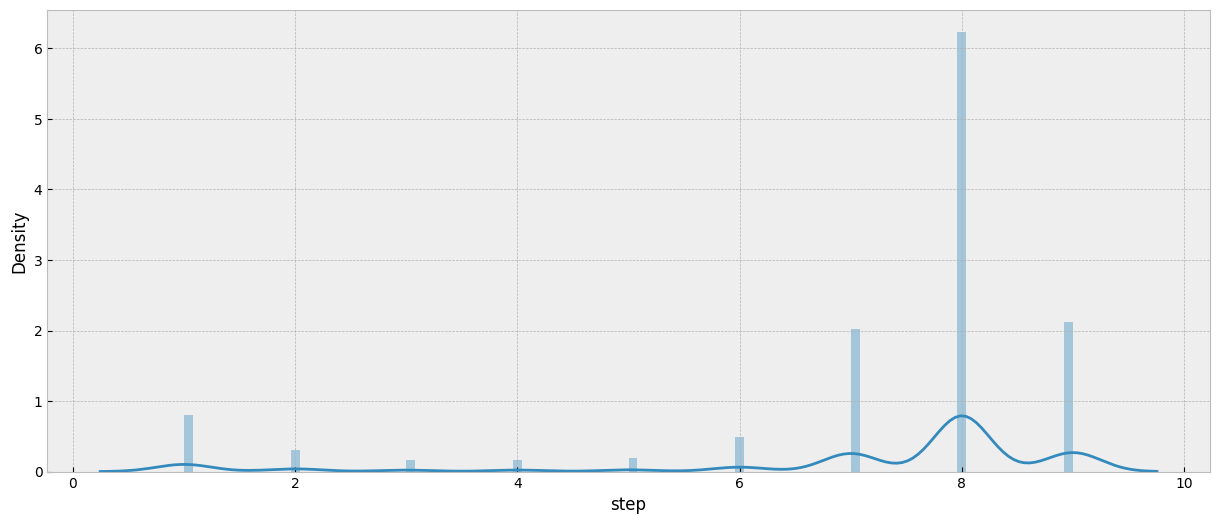

In [19]:
plt.figure(figsize=(15,6))
sns.distplot(train['step'],bins=100)

**The above graph indicates the distribution of the step column**

<Axes: xlabel='amount', ylabel='Density'>

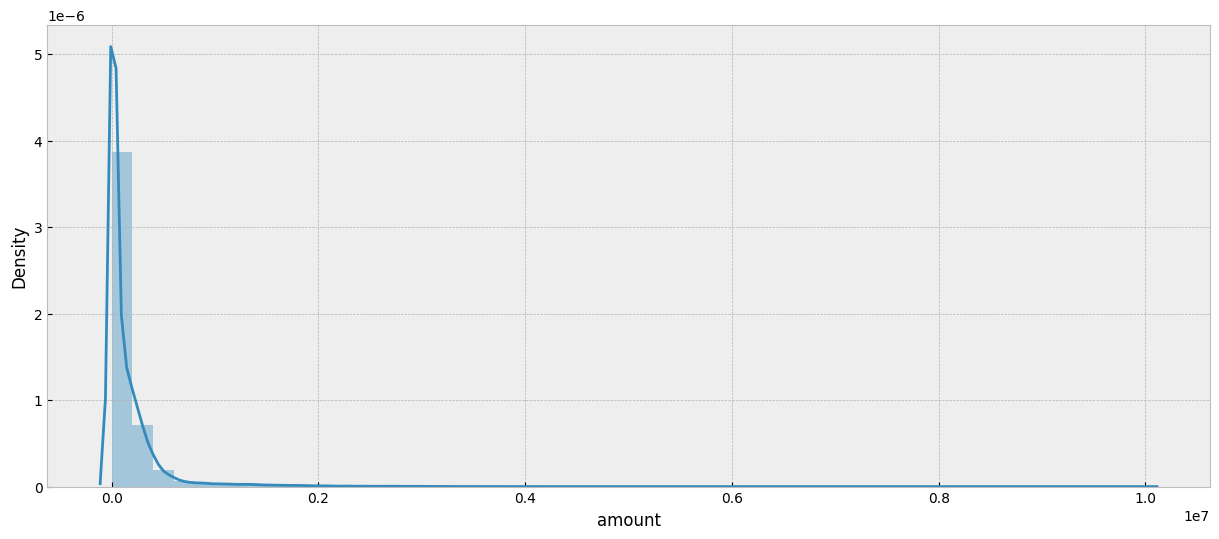

In [20]:
plt.figure(figsize=(15,6))
sns.distplot(train['amount'])

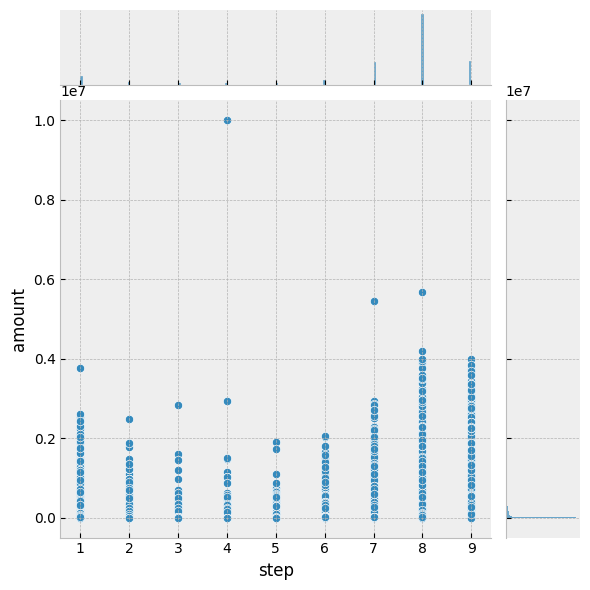

In [21]:
sns.jointplot(x='step',y='amount',data=train)

**The above graph indicates that a step value of approx. 300 corresponds to the maximum amount transfered to a recipient.**

In [22]:
train['isFraud'].value_counts()

0.0    42176
1.0       94
Name: isFraud, dtype: int64

In [23]:
8213/6354407*100

0.129248881917699

**8213 transactions have been tagged as fraudulent in the dataset, which is approx. 0.13% of the total number of transactions.**

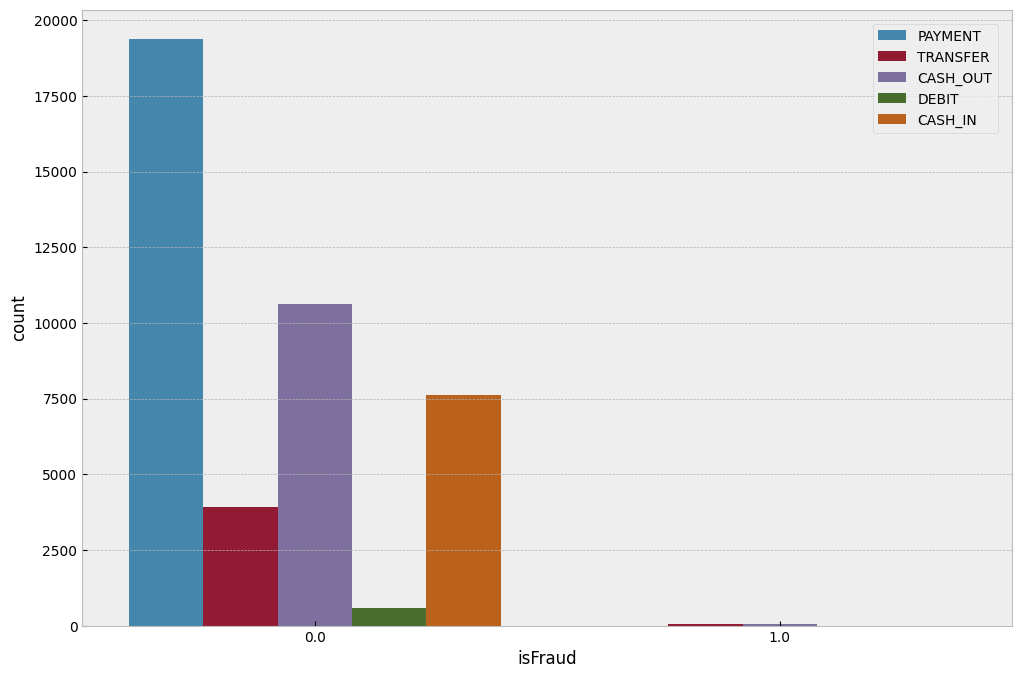

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=train,hue='type')
plt.legend(loc=[0.85,0.8])

**Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions.**

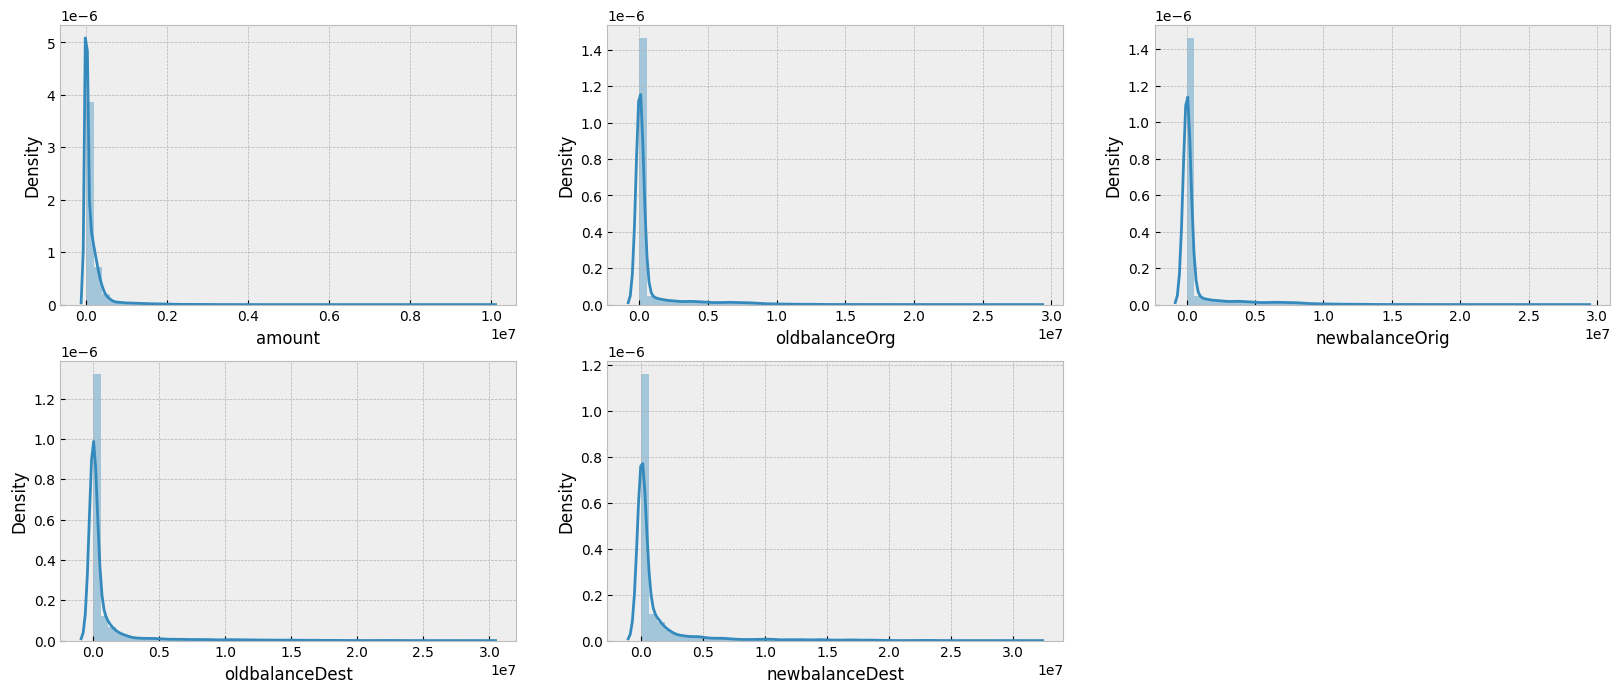

In [25]:
# Plotting all numerical features for distrubution check
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.distplot(train[feature])
plt.show()

**All features except 'Transaction_Hours' have right skewed distribution
Skewed data - When a distribution is skewed it means data is asymmetrucally distributed and indicates the presence of outliers
The direction of skewness shows the directon of the outliers either in postive or negative end.
It can be rectified by removing outliers, normalizing or transforming the data using log, boxcox or polynomial transformation**

In [26]:
type_new = pd.get_dummies(train['type'],drop_first=True)

In [27]:
train = pd.concat([train,type_new],axis=1)

In [28]:
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,0,1,0


In [29]:
X = train[['step','CASH_OUT','DEBIT','PAYMENT','TRANSFER','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = train['isFraud']

In [30]:
X

,step,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,0,0,1,0,9839.64,170136.0,160296.36,0.00,0.00,0.0
1,1,0,0,1,0,1864.28,21249.0,19384.72,0.00,0.00,0.0
2,1,0,0,0,1,181.00,181.0,0.00,0.00,0.00,0.0
3,1,1,0,0,0,181.00,181.0,0.00,21182.00,0.00,0.0
4,1,0,0,1,0,11668.14,41554.0,29885.86,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,1,0,0,0,195364.06,0.0,0.00,506957.59,1343781.67,0.0
42267,9,1,0,0,0,546075.62,0.0,0.00,5075471.31,5621546.93,0.0
42268,9,1,0,0,0,111003.87,0.0,0.00,2533159.94,2644163.81,0.0
42269,9,1,0,0,0,101025.44,0.0,0.00,156646.32,491301.04,0.0


In [31]:
from sklearn.metrics import classification_report

In [32]:
#X = train.drop(['isFraud'], axis=1)
#y = train['isFraud']

#Encoding
#encoder = LabelEncoder()
#categorical_features = X.columns.tolist()
#for each in categorical_features:
    #X[each] = encoder.fit_transform(X[each])
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X)

(29589, 11)
(12682, 11)
(29589,)
(12682,)
       step  CASH_OUT  DEBIT  PAYMENT  TRANSFER     amount  oldbalanceOrg  \
0         1         0      0        1         0    9839.64       170136.0   
1         1         0      0        1         0    1864.28        21249.0   
2         1         0      0        0         1     181.00          181.0   
3         1         1      0        0         0     181.00          181.0   
4         1         0      0        1         0   11668.14        41554.0   
...     ...       ...    ...      ...       ...        ...            ...   
42266     9         1      0        0         0  195364.06            0.0   
42267     9         1      0        0         0  546075.62            0.0   
42268     9         1      0        0         0  111003.87            0.0   
42269     9         1      0        0         0  101025.44            0.0   
42270     9         1      0        0         0  271441.28            0.0   

       newbalanceOrig  oldbalance

In [44]:
train['newbalanceDest']=train['newbalanceDest'].fillna(0)
train['isFlaggedFraud']=train['isFlaggedFraud'].fillna(0)
train['oldbalanceOrg']=train['oldbalanceOrg'].fillna(0)
train['oldbalanceDest']=train['oldbalanceDest'].fillna(0)

In [45]:
X = train[['step','CASH_OUT','DEBIT','PAYMENT','TRANSFER','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = train['isFraud']

In [46]:
X

,step,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,0,0,1,0,9839.64,170136.0,160296.36,0.00,0.00,0.0
1,1,0,0,1,0,1864.28,21249.0,19384.72,0.00,0.00,0.0
2,1,0,0,0,1,181.00,181.0,0.00,0.00,0.00,0.0
3,1,1,0,0,0,181.00,181.0,0.00,21182.00,0.00,0.0
4,1,0,0,1,0,11668.14,41554.0,29885.86,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,1,0,0,0,195364.06,0.0,0.00,506957.59,1343781.67,0.0
42267,9,1,0,0,0,546075.62,0.0,0.00,5075471.31,5621546.93,0.0
42268,9,1,0,0,0,111003.87,0.0,0.00,2533159.94,2644163.81,0.0
42269,9,1,0,0,0,101025.44,0.0,0.00,156646.32,491301.04,0.0


In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification




os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
counter=Counter(y_train)
print('before :',counter)
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
counter=Counter(os_data_y)
print('after :',counter)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['isFraud'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of not fraud transaction in oversampled data",len(os_data_y[os_data_y['isFraud']==0]))
print("Number of fraud transaction",len(os_data_y[os_data_y['isFraud']==1]))
print("Proportion of not fraud transaction data in oversampled data is ",len(os_data_y[os_data_y['isFraud']==0])/len(os_data_X))
print("Proportion of fraud transaction in oversampled data is ",len(os_data_y[os_data_y['isFraud']==1])/len(os_data_X))

before : Counter({0.0: 29517, 1.0: 72})
after : Counter({0.0: 29517, 1.0: 29517})
length of oversampled data is  59034
Number of not fraud transaction in oversampled data 29517
Number of fraud transaction 29517
Proportion of not fraud transaction data in oversampled data is  0.5
Proportion of fraud transaction in oversampled data is  0.5


In [48]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

#logreg = LogisticRegression(solver='liblinear', random_state=0)

#logreg.fit(X_train_os, y_train_os)

#y_pred_os= logreg.predict(X_test_os)

In [49]:
# example of grid searching key hyperparametres for logistic regression
""""
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_os, y_train_os)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_os, y_train_os)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9279861641145646


In [52]:
y_pred_os= logreg_cv.predict(X_test_os)
print(classification_report(y_test_os,y_pred_os))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      5869
         1.0       0.92      0.95      0.93      5938

    accuracy                           0.93     11807
   macro avg       0.93      0.93      0.93     11807
weighted avg       0.93      0.93      0.93     11807



In [54]:
print("fTraining Accuracy:" ,accuracy_score(y_train_os, logreg_cv.predict(X_train_os)))
print("fTesting Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("fTesting Confusion Matrix: \n",confusion_matrix(y_test_os, y_pred_os))
print("Recall Score : ",recall_score(y_test_os, y_pred_os, pos_label='positive', average='micro'))    
print("Precision Score : ",precision_score(y_test_os, y_pred_os,  pos_label='positive',average='micro'))     
print("fTesting F-1:", f1_score(y_test_os, y_pred_os, pos_label='positive', average='micro'))
print("fTesting F-Beta:", fbeta_score(y_test_os, y_pred_os, beta=0.5, pos_label='positive', average='micro'))
print('-'*30)

fTraining Accuracy: 0.9280919812818939
fTesting Accuracy: 0.9302108918438214
fTesting Confusion Matrix: 
 [[5346  523]
 [ 301 5637]]
Recall Score :  0.9302108918438214
Precision Score :  0.9302108918438214
fTesting F-1: 0.9302108918438214
fTesting F-Beta: 0.9302108918438214
------------------------------
